Analysis of weather variable data at station 'ACME'

In [103]:
# importing necessary modules
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
# total column-integrated condensate over the entire atmosphere at station 'ACME: tc'
tc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_condensate\\tc_station.csv", header=None)
# total cloud cover over the entire depth of the atmosphere at station 'ACME: tcc'
tcc = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Total_cloud_cover\\tcc_station.csv", header=None)
# specific humidity at 2 m above ground 'ACME: h'
h = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Sp_humidity\\h_station.csv", header=None)
# precipitable water over the entire depth of the atmosphere at station 'ACME: pw'
pw = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precip_water\\pw_station.csv", header=None)
# 3-Hour accumulated precipitation at the surface at station 'ACME': precip
precip = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Precipitation\\precip_station.csv", header=None)
# air pressure at mean sea level at 'ACME': pr
pr = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Pressure\\pr_station.csv", header=None)

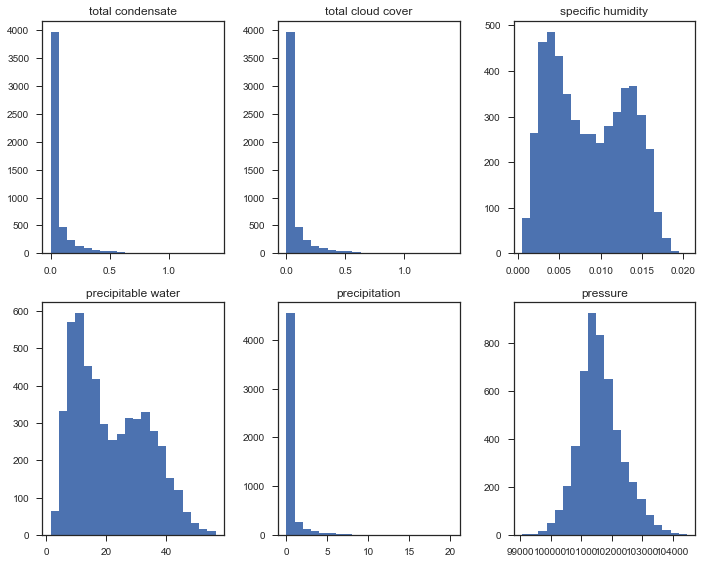

In [120]:
# Histograms of all the weather variables to see frequency distribution from 14 years of data

fig, axes = plt.subplots(nrows=2, ncols=3)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
n_bins = 20
ax0.hist(tc[0], n_bins, histtype='bar', label='tc')
ax0.set_title('total condensate')

ax1.hist(tcc[0], n_bins, histtype='bar', label='tcc')
ax1.set_title('total cloud cover')

ax2.hist(h[0], n_bins, histtype='bar', label='h')
ax2.set_title('specific humidity')

ax3.hist(pw[0], n_bins, histtype='bar', label='pw')
ax3.set_title('precipitable water')

ax4.hist(precip[0], n_bins, histtype='bar', label='precip')
ax4.set_title('precipitation')

ax5.hist(pr[0], n_bins, histtype='bar', label='pr')
ax5.set_title('pressure')


fig.tight_layout()
plt.show()

plt.rcParams["figure.figsize"] = [10,8]


In [118]:
# standard deviation of weather variables:
print('standard deviations:')
print('total condensate:', tc.stack().std(), ', total cloud cover:', tcc.stack().std(), ', specific humidity:', h.stack().std(), ', precipitable water:', pw.stack().std(), ', precipitation:', precip.stack().std(), ', pressure:', pr.stack().std())

# Arithmatic mean of weather variables:
print('Arithmatic mean:')
print('total condensate:', tc[0].mean(), ', total cloud cover:', tcc[0].mean(), ', specific humidity:', h[0].mean(), ', precipitable water:', pw[0].mean(), ', precipitation:', precip[0].mean(), ', pressure:', pr[0].mean())


standard deviations:
total condensate: 0.12718633788532685 , total cloud cover: 0.12730515521564587 , specific humidity: 0.004573394727437578 , precipitable water: 11.959800673751245 , precipitation: 1.2093061888054686 , pressure: 715.369578336432
Arithmatic mean:
total condensate: 0.06129602875024447 , total cloud cover: 0.0609797201251711 , specific humidity: 0.008635116956776845 , precipitable water: 21.608478960101667 , precipitation: 0.4076328603559559 , pressure: 101627.68534759962


              tc       tcc         h        pw    precip        pr
tc      1.000000  0.999995  0.036771  0.200444  0.755274 -0.039275
tcc     0.999995  1.000000  0.036724  0.200447  0.755142 -0.039151
h       0.036771  0.036724  1.000000  0.919065  0.197026 -0.533561
pw      0.200444  0.200447  0.919065  1.000000  0.313139 -0.412044
precip  0.755274  0.755142  0.197026  0.313139  1.000000 -0.122777
pr     -0.039275 -0.039151 -0.533561 -0.412044 -0.122777  1.000000


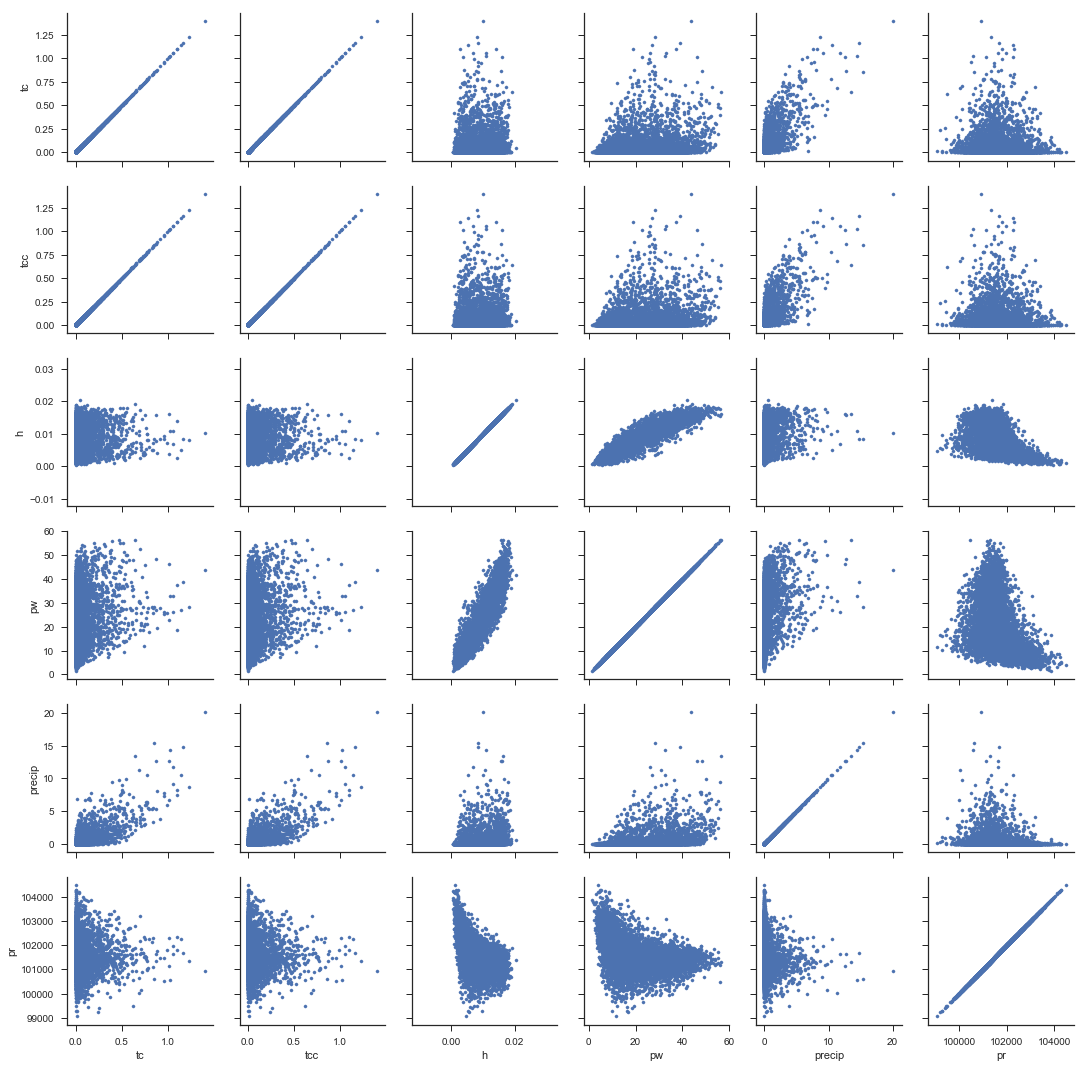

In [71]:
# finding correlation among the variables
var = pd.concat([tc, tcc, h, pw, precip, pr], axis=1)
var.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']

# correlation coefficients
var_corr = var.corr()
print(var_corr)

# visualizing correlation cofficient
sns.set(style="ticks")
var_g = sns.PairGrid(var)
var_g.map(plt.scatter, s=10)


Linear correlation between total condensate (tc) and total cloud cover (tcc) is remarkably high. we can get rid of one variable here. Also the precipitable water (pw) and specific humidity are strongly correlated.

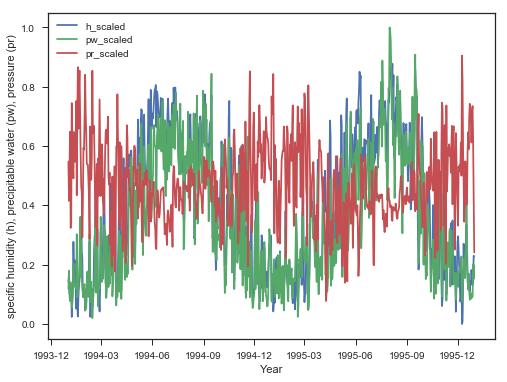

In [124]:
# time series of weater variables: any seasonality??
dates = np.arange(np.datetime64('1994-01-01'), np.datetime64('2008-01-01'))
dates[:365]
# scaling the data to examine them in same plot
from sklearn import preprocessing

x = var.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
var_sc = pd.DataFrame(x_scaled)
var_sc.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']
#print(var_sc)

plt.plot(dates[:730], var_sc['h'][:730], label='h_scaled')
plt.plot(dates[:730], var_sc['pw'][:730], label='pw_scaled')
plt.plot(dates[:730], var_sc['pr'][:730], label='pr_scaled')
plt.xlabel('Year')
plt.ylabel('specific humidity (h), precipitable water (pw), pressure (pr)')
plt.legend(loc='upper left')
plt.show()
plt.rcParams["figure.figsize"] = [6,6]
# only 'h', 'pw', and 'pr' have seasonality



during summer specific humidity (h) and precipitable water (pw) high.
during winter pressure (pr) is high. (AS expected)

In [146]:
# for all weather variables
file = [tc, tcc, h, pw, precip, pr]
avg_var = pd.DataFrame()
annual_var = pd.DataFrame()
for j in range(6):
    v = file[j]
    #Averaging  over each day in the year: avg_rf
    # Annual average : annual_rf
    # days in year from 1994 to 2007: leap year- 1996, 2000, 2004
    d = [365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113]

    yr = v[:365]

    for i in range(2007 - 1994):
        #print(d[i], d[i+1])
        yr1 = v[d[i]:d[i+1]]
        yr1.reset_index(inplace=True, drop=True)
        yr = pd.concat([yr, yr1], axis=1)
    a = list(range(1994, 2008))
    yr = yr[:365]
    yr.columns = a

    avg_yr = yr.mean(axis=1)
    annual_avg = yr.mean(axis=0)
    #print(type(avg_yr))
    avg_var = pd.concat([avg_var, avg_yr], axis=1)
    annual_var = pd.concat([annual_var, annual_avg], axis=1)
avg_var.columns = ['tc', 'tcc', 'h', 'pw', 'precip', 'pr']
annual_var.columns = avg_var.columns


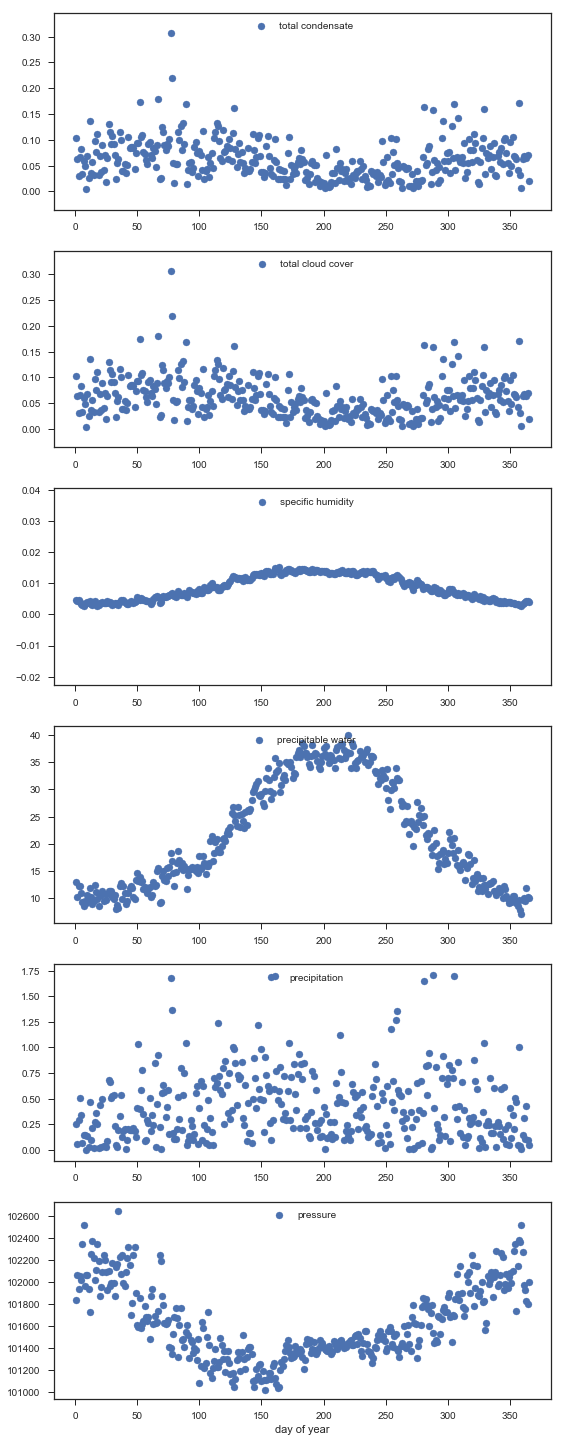

In [147]:
# Any seasonality in the variables?
days = list(range(1, 366))

fig, axes = plt.subplots(nrows=6, ncols=1)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0.scatter(days, avg_var['tc'], label='total condensate')
ax0.legend(loc='upper center')

ax1.scatter(days, avg_var['tcc'], label='total cloud cover')
ax1.legend(loc='upper center')

ax2.scatter(days, avg_var['h'], label='specific humidity')
ax2.legend(loc='upper center')

ax3.scatter(days, avg_var['pw'], label='precipitable water')
ax3.legend(loc='upper center')

ax4.scatter(days, avg_var['precip'], label='precipitation')
ax4.legend(loc='upper center')

ax5.scatter(days, avg_var['pr'], label='pressure')
ax5.legend(loc='upper center')


fig.tight_layout()
plt.rcParams["figure.figsize"] = [8,20]
plt.xlabel('day of year')
plt.show()

Annual average shows seasonality in couple of variables especially specific humidity, 

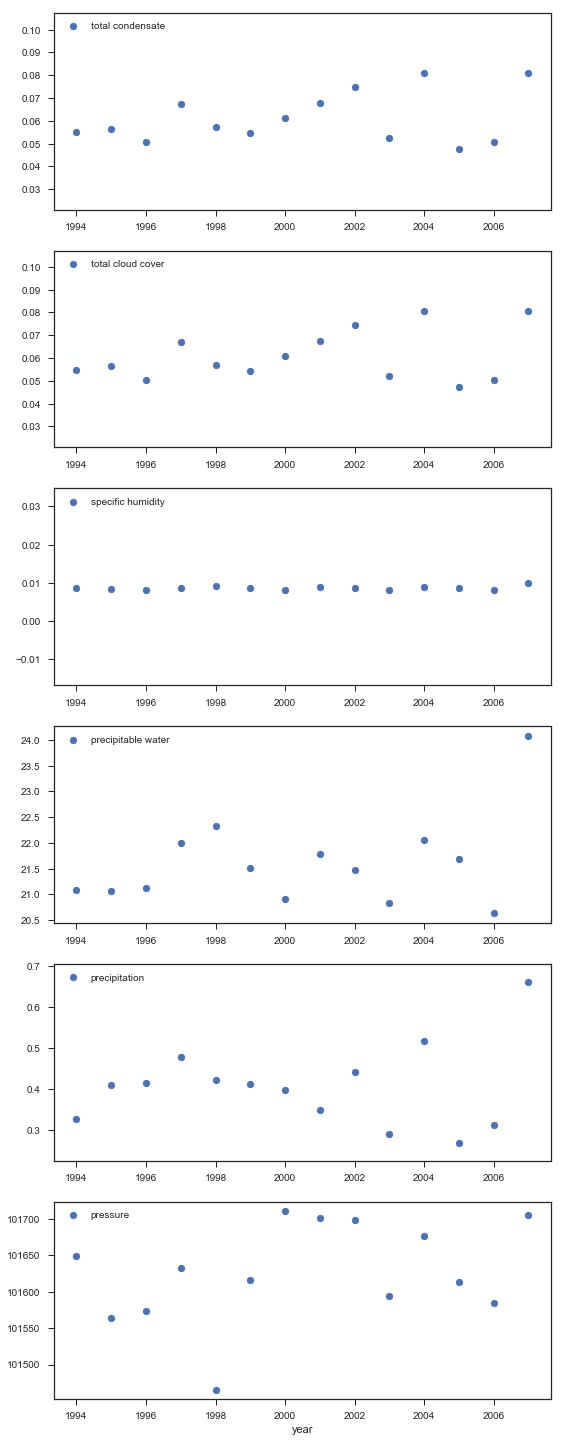

In [148]:
# Any trend in annual average values?? Not apperant from the plot
year = list(range(1994, 2008))

fig, axes = plt.subplots(nrows=6, ncols=1)
ax0, ax1, ax2, ax3, ax4, ax5 = axes.flatten()
ax0.scatter(year, annual_var['tc'], label='total condensate')
ax0.legend(loc='upper left')

ax1.scatter(year, annual_var['tcc'], label='total cloud cover')
ax1.legend(loc='upper left')

ax2.scatter(year, annual_var['h'], label='specific humidity')
ax2.legend(loc='upper left')

ax3.scatter(year, annual_var['pw'], label='precipitable water')
ax3.legend(loc='upper left')

ax4.scatter(year, annual_var['precip'], label='precipitation')
ax4.legend(loc='upper left')

ax5.scatter(year, annual_var['pr'], label='pressure')
ax5.legend(loc='upper left')


fig.tight_layout()
plt.rcParams["figure.figsize"] = [8,20]
plt.xlabel('year')
plt.show()

No as such long term trend in any of these variables is evident